In [2]:
import numpy as np
import pandas as pd
from math import factorial

1. Lanza una moneda al aire 10 veces, ¿cuantos resultados posibles forman parte del espacio muestral?.

In [3]:
print(2*10)

20


2. En un aeropuerto se tiene a 10 pasajeros esperando en la sala de preembarque, la polícia debe controlar a 3 de ellos. ¿Cuantas combinaciones posibles se pueden obtener?.

In [4]:
c_pasajeros = factorial(10)/(factorial(3)*factorial(10-3))
print(c_pasajeros)

120.0


3. La Agencia Nacional de Seguridad Vial realizó una investigación para saber si los conductores de están usando sus cinturones de seguridad. Los datos muestrales fueron los siguientes:<br>
Conductores que emplean el cinturón <br>

![Ejercicio](../_src/assets/ejercicio3.PNG)

- a) ¿Qué metodo cree que se utilizo para asignar probabilidades?.
- b) Construya un cuadro similar, pero con la asignación de probabilidades.
- c) ¿Cuál sería el mejor método pára estimar la probabilidad de que en Estados Unidos un conductor lleve puesto el cinturón?.
- d) Un año antes, la probabilidad en Argentina de que un conductor llevara puesto el cinturón era 0.75. El director de ANSV, se esperaba que la probabilidad llegara a 0.78. ¿Estará satisfecho con los resultados del estudio? (Utilizar tabla adjunta (![Ejercicio](../_src/assets/ejercicio3.PNG))
- e) ¿Cuál es la probabilidad de que se use el cinturón en las distintas regiones del país? ¿En qué región se usa más el cinturón?(Utilizar misma tabla que el ejercicio anterior).


In [5]:
import pandas as pd
regiones = ['Norte','Noreste','Sur','Centro']
valores_si = [148, 162, 296, 252]
valores_no = [52, 54, 74, 48]
datos = dict(Si = valores_si, No = valores_no)
cuadro = pd.DataFrame(datos, index=regiones)

In [6]:
cuadro

,Si,No
Norte,148,52
Noreste,162,54
Sur,296,74
Centro,252,48


In [7]:
cuadro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Norte to Centro
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Si      4 non-null      int64
 1   No      4 non-null      int64
dtypes: int64(2)
memory usage: 96.0+ bytes


In [47]:
total_conductores = cuadro['Si'].sum() + cuadro['No'].sum()
total_conductores

1086

In [48]:
cuadro_2 = (cuadro/total_conductores).round(2)
cuadro_2

,Si,No
Norte,0.14,0.05
Noreste,0.15,0.05
Sur,0.27,0.07
Centro,0.23,0.04


In [49]:
cuadro_2.loc['Total'] = [cuadro_2.Si.sum(), cuadro_2.No.sum()]
cuadro_2['Total por region'] = cuadro_2.iloc[:,[0,1]].sum(axis=1)
cuadro_2

,Si,No,Total por region
Norte,0.14,0.05,0.19
Noreste,0.15,0.05,0.20
Sur,0.27,0.07,0.34
Centro,0.23,0.04,0.27
Total,0.79,0.21,1.00


In [50]:
import matplotlib.pyplot as plt

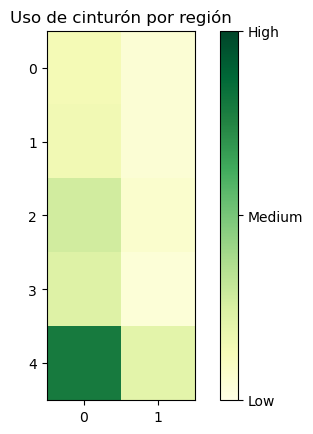

In [58]:
plt.imshow(cuadro_2[['Si','No']], cmap="YlGn", vmin=0.0, vmax=1.0)
plt.title('Uso de cinturón por región')

cbar = plt.colorbar(ticks=[0, 0.5, 1])
cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])
plt.show()

In [59]:
import seaborn as sb

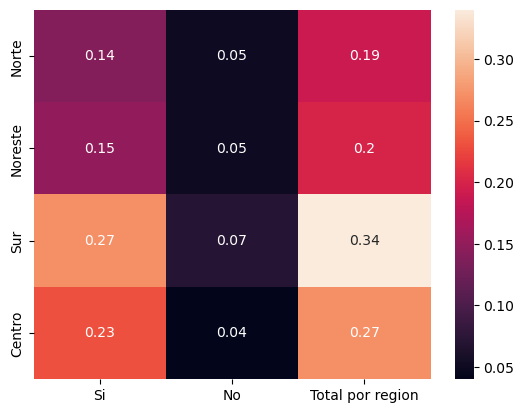

In [78]:
calor =   sb.heatmap(cuadro_2[:-1][['Si', 'No', 'Total por region']], annot=True)